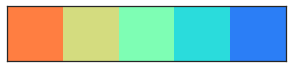

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain
import os


sns.set(style = 'white', font_scale=2)

color = sns.color_palette("rainbow_r",5) #PiYG
sns.palplot(color)

In [3]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_auc_score, matthews_corrcoef, precision_score, recall_score, f1_score



In [4]:
paths = ['./mapping_Cirrhosis_results',
        './mapping_IBD_results', 
        './mapping_Obesity_results',
        './mapping_T2D_results']

names = ['Cirrhosis', 'IBD', 'Obesity', 'T2D']

alldf = []
for ps, name in zip(paths, names):
    df = pd.read_pickle(os.path.join(ps, 'dfres_10FCV_10times.pkl'))
    df['dataset'] = name
    alldf.append(df)
dfres = pd.concat(alldf).reset_index(drop=True)

In [5]:
def _get_auc(df):
    aucs = []
    for y_true, y_score  in zip(df.y_true, df.y_score):
        auc_value = roc_auc_score(y_true, y_score, average='weighted') # weighted AUC
        aucs.append(auc_value)
    return aucs

In [61]:
order = ['Random', 'MDS', 'UMAP',  't-SNE', 'LLE', 'ISOMAP'] 

#['Random', 'SE', 'MDS', 'UMAP', 't-SNE', 'ISOMAP', 'LLE']

color = sns.color_palette("rainbow_r", len(order)).as_hex() #PiYG

In [62]:
dfp = dfres.groupby(['method','repeat_seed', 'dataset']).apply(_get_auc).apply(pd.Series).mean(axis=1).reset_index()

In [63]:
dfp.groupby('method')[0].mean().sort_values()

method
Random    0.799686
SE        0.810286
MDS       0.812631
UMAP      0.813948
t-SNE     0.814769
ISOMAP    0.820696
LLE       0.822684
Name: 0, dtype: float64

/home/shenwanxiang/anaconda3/envs/molmap/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


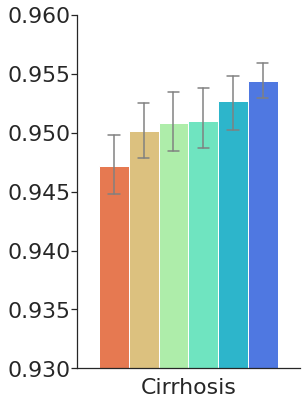

In [64]:
dfp1 = dfp[dfp.dataset == 'Cirrhosis']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,6.5), sharex=True, )

sns.barplot(x = 'dataset', y = 0, hue='method', data = dfp1, 
            hue_order=order, palette=color, capsize=0.05, errcolor='.5', errwidth=1.5)
ax.set_ylim(0.93, 0.96)
ax.legend().remove()
ax.set_ylabel('')
ax.set_xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', left='off', labelleft='on', pad=.3,)

fig.savefig('./results/Cirrhosis.pdf', bbox_inches='tight', dpi=400) 

/home/shenwanxiang/anaconda3/envs/molmap/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


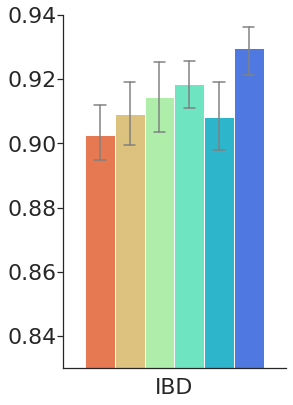

In [65]:
dfp1 = dfp[dfp.dataset == 'IBD']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,6.5), sharex=True, )

sns.barplot(x = 'dataset', y = 0, hue='method', data = dfp1, 
            hue_order=order, palette=color, capsize=0.05, errcolor='.5', errwidth=1.5)
ax.set_ylim(0.83, 0.94)
ax.legend().remove()
ax.set_ylabel('')
ax.set_xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', left='off', labelleft='on', pad=.3,)
fig.savefig('./results/IBD.pdf', bbox_inches='tight', dpi=400) 

/home/shenwanxiang/anaconda3/envs/molmap/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


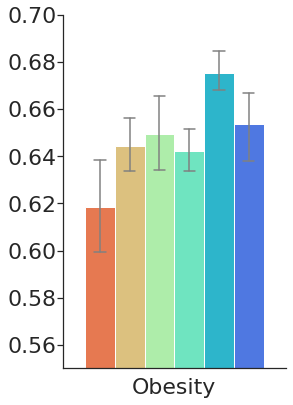

In [66]:
dfp1 = dfp[dfp.dataset == 'Obesity']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,6.5), sharex=True, )

sns.barplot(x = 'dataset', y = 0, hue='method', data = dfp1, 
            hue_order=order, palette=color, capsize=0.05, errcolor='.5', errwidth=1.5)
ax.set_ylim(0.55, 0.70)
ax.legend().remove()
ax.set_ylabel('')
ax.set_xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', left='off', labelleft='on', pad=.3,)
fig.savefig('./results/Obesity.pdf', bbox_inches='tight', dpi=400) 

/home/shenwanxiang/anaconda3/envs/molmap/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


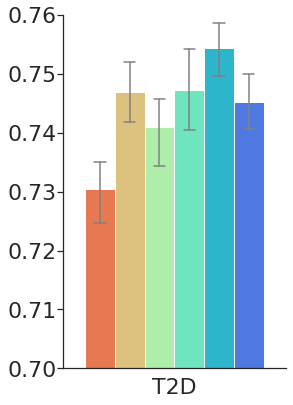

In [67]:
dfp1 = dfp[dfp.dataset == 'T2D']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,6.5), sharex=True, )

sns.barplot(x = 'dataset', y = 0, hue='method', data = dfp1, 
            hue_order=order, palette=color, capsize=0.05, errcolor='.5', errwidth=1.5)
ax.set_ylim(0.7, 0.76)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5)).remove()
ax.set_ylabel('')
ax.set_xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', left='off', labelleft='on', pad=.3,)
fig.savefig('./results/T2D.pdf', bbox_inches='tight', dpi=400) 

/home/shenwanxiang/anaconda3/envs/molmap/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


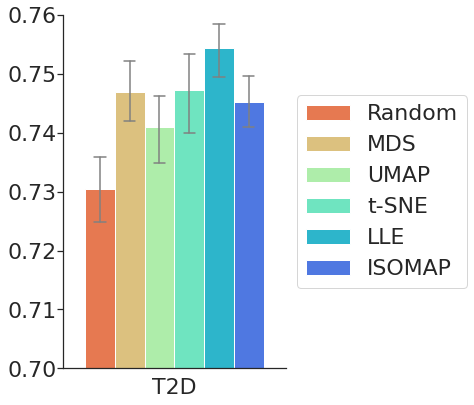

In [68]:
dfp1 = dfp[dfp.dataset == 'T2D']

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4,6.5), sharex=True, )

sns.barplot(x = 'dataset', y = 0, hue='method', data = dfp1, 
            hue_order=order, palette=color, capsize=0.05, errcolor='.5', errwidth=1.5)
ax.set_ylim(0.7, 0.76)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('')
ax.set_xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='y', left='off', labelleft='on', pad=.3,)
fig.savefig('./results/T2D2.pdf', bbox_inches='tight', dpi=400) 